In [117]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime as dt
from sklearn.cluster import KMeans

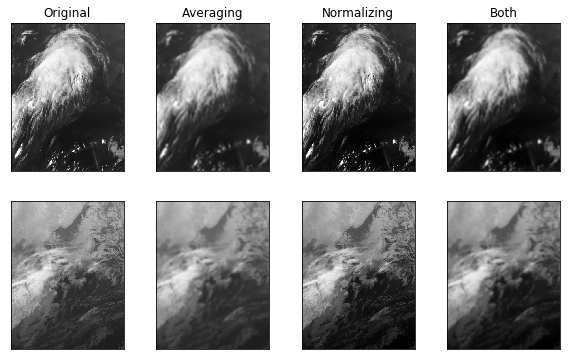

In [27]:
img = cv2.imread('../data/input/train/sat/2016-07-01/2016-07-01-11-00.fv.png')

# Averaging
kernel_size = 10
kernel = np.ones((kernel_size,kernel_size),np.float32)/(kernel_size**2)
dst1 = cv2.filter2D(img,-1,kernel)

# Normalizing
dst2 = (img-(img.min()))/(img.max()-img.min())

# Both
dst3 = cv2.filter2D(dst2,-1,kernel)

plt.figure(figsize=(10,6))
plt.subplot(241),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(242),plt.imshow(dst1),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.subplot(243),plt.imshow(dst2),plt.title('Normalizing')
plt.xticks([]), plt.yticks([])
plt.subplot(244),plt.imshow(dst3),plt.title('Both')
plt.xticks([]), plt.yticks([])

img = cv2.imread('../data/input/train/sat/2016-01-31/2016-01-31-14-00.fv.png')

# Averaging
kernel_size = 10
kernel = np.ones((kernel_size,kernel_size),np.float32)/(kernel_size**2)
dst1 = cv2.filter2D(img,-1,kernel)

# Normalizing
dst2 = (img-(img.min()))/(img.max()-img.min())

# Both
dst3 = cv2.filter2D(dst2,-1,kernel)

plt.subplot(245),plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.subplot(246),plt.imshow(dst1)
plt.xticks([]), plt.yticks([])
plt.subplot(247),plt.imshow(dst2)
plt.xticks([]), plt.yticks([])
plt.subplot(248),plt.imshow(dst3)
plt.xticks([]), plt.yticks([])

plt.show()

## Monthly pixel average

In [153]:
def calc_pixel_mean(img_path):
    img_path = '.' + img_path
    img = cv2.imread(img_path)
    
    # Averaging
    kernel_size = 10
    kernel = np.ones((kernel_size,kernel_size),np.float32)/(kernel_size**2)
    img = cv2.filter2D(img,-1,kernel)

    # Normalizing
    img = (img-(img.min()))/(img.max()-img.min())
    
    img_mean = img.mean()
    return img_mean

def calc_pixel_variance(img_path):
    img_path = '.' + img_path
    img = cv2.imread(img_path)
    
    # Averaging
    kernel_size = 10
    kernel = np.ones((kernel_size,kernel_size),np.float32)/(kernel_size**2)
    img = cv2.filter2D(img,-1,kernel)

    # Normalizing
    img = (img-(img.min()))/(img.max()-img.min())
    
    img_var = img.var()
    return img_var

def file_name2date(img_file_name):
    file_date = img_file_name.split('.')[0]
    file_date = dt.strptime(file_date, '%Y-%m-%d-%H-%M')
    return file_date

In [154]:
test_info_df = pd.read_csv('../data/external/test_img_path_info.csv')
train_info_df = pd.read_csv('../data/external/train_img_path_info.csv')
sat_info_df = pd.concat([train_info_df, test_info_df])
sat_info_df = sat_info_df[sat_info_df['file_not_exist'] == 0]
sat_info_df['pixel_mean'] = sat_info_df['img_path'].apply(calc_pixel_mean)
sat_info_df['pixel_var'] = sat_info_df['img_path'].apply(calc_pixel_variance)
sat_info_df['file_date'] = sat_info_df['img_file_name'].apply(file_name2date)

In [158]:
ym_df = sat_info_df.set_index('file_date').drop(['Unnamed: 0', 'file_not_exist'], axis=1)
ym_df = ym_df.set_index([ym_df.index.year, ym_df.index.month, ym_df.index])
ym_df.index.names = ['year', 'month', 'date']
monthly_pixel_mean_df = ym_df.mean(level=['year', 'month']).reset_index()

n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
# monthly_pixel_mean_df['cluster'] = kmeans.fit(monthly_pixel_mean_df['pixel_mean'].values.reshape(-1, 1)).labels_
monthly_pixel_mean_df['cluster'] = kmeans.fit(monthly_pixel_mean_df[['pixel_mean', 'pixel_var']]).labels_
display(monthly_pixel_mean_df.sort_values(['cluster', 'month']))

monthly_pixel_mean_df.to_csv('../data/external/monthly_pixel_cluster.csv', index=False)

,year,month,pixel_mean,pixel_var,cluster
26,2018,3,0.315735,0.043847,0
27,2018,4,0.316888,0.050517,0
28,2018,5,0.308851,0.053539,0
8,2016,9,0.300316,0.058415,0
9,2016,10,0.291421,0.050671,0
21,2017,10,0.293666,0.052489,0
34,2018,11,0.309535,0.046570,0
0,2016,1,0.419061,0.049431,1
12,2017,1,0.380213,0.049788,1
24,2018,1,0.419967,0.045242,1
